#### Student Depression Variable Imputation

#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Read Dataset

In [2]:
df = pd.read_csv("Synthetic_Data_Cleaning_example.csv")
df.head()

,Age,Income,Gender,Registered,City
0,34.967142,28769.438869,Male,1.0,New York
1,28.617357,43690.320159,Female,0.0,Paris
2,36.476885,44859.282252,MALE,1.0,Tokyo
3,45.230299,37965.840962,FEMALE,0.0,Berlin
4,27.658466,47580.714325,male,1.0,New York


#### Exploratory Data Analysis

In [3]:
df.isnull().sum()

Age            1
Income         1
Gender        20
Registered     1
City           1
dtype: int64

In [4]:
df.head()

,Age,Income,Gender,Registered,City
0,34.967142,28769.438869,Male,1.0,New York
1,28.617357,43690.320159,Female,0.0,Paris
2,36.476885,44859.282252,MALE,1.0,Tokyo
3,45.230299,37965.840962,FEMALE,0.0,Berlin
4,27.658466,47580.714325,male,1.0,New York


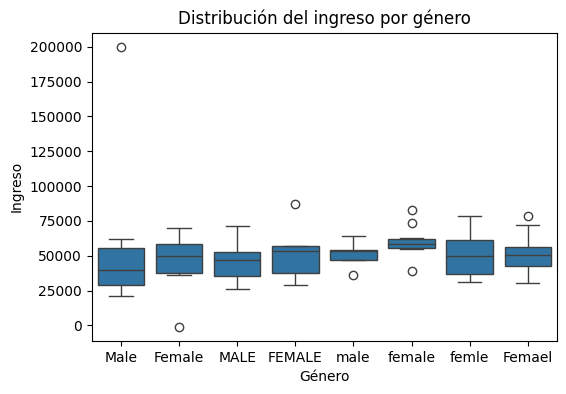

In [5]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='Gender', y='Income')
plt.title("Distribución del ingreso por género")
plt.xlabel("Género")
plt.ylabel("Ingreso")
plt.show()

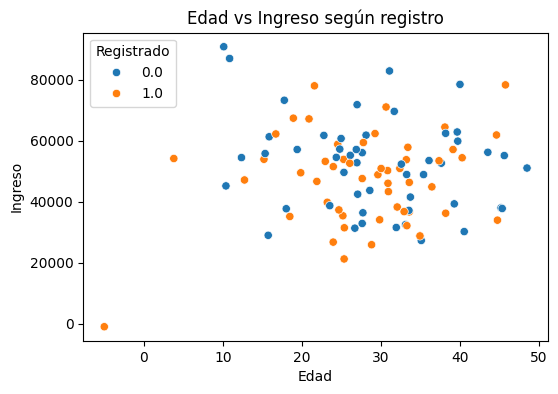

In [6]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='Age', y='Income', hue='Registered')
plt.title("Edad vs Ingreso según registro")
plt.xlabel("Edad")
plt.ylabel("Ingreso")
plt.legend(title='Registrado')
plt.show()

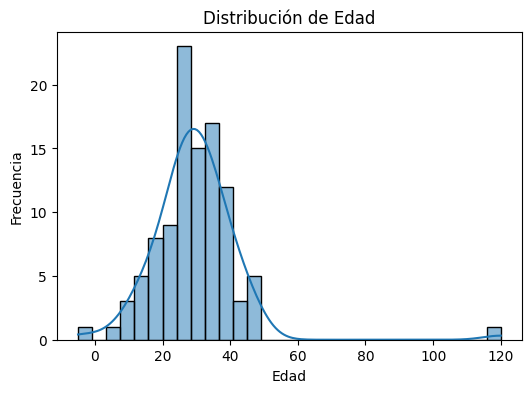

In [7]:
plt.figure(figsize=(6,4))
sns.histplot(data=df, x='Age', kde=True, bins=30)
plt.title("Distribución de Edad")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()

In [8]:
df['Income_log'] = df['Income'].apply(lambda x: np.log(x + 1))

C:\Users\gabri\AppData\Local\Temp\ipykernel_17104\987124458.py:1: RuntimeWarning: invalid value encountered in log
  df['Income_log'] = df['Income'].apply(lambda x: np.log(x + 1))


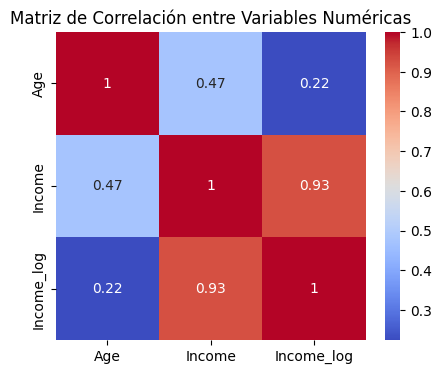

In [9]:
plt.figure(figsize=(5,4))
sns.heatmap(df[['Age', 'Income', 'Income_log']].corr(), annot=True, cmap='coolwarm')
plt.title("Matriz de Correlación entre Variables Numéricas")
plt.show()

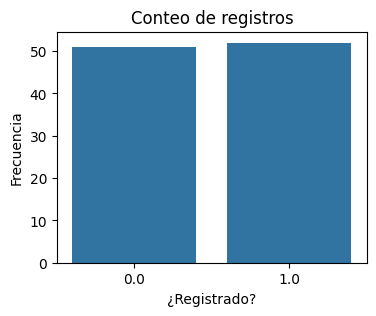

In [10]:
plt.figure(figsize=(4,3))
sns.countplot(x='Registered', data=df)
plt.title("Conteo de registros")
plt.xlabel("¿Registrado?")
plt.ylabel("Frecuencia")
plt.show()

#### Data Cleaning

In [11]:

df = pd.read_csv("Synthetic_Data_Cleaning_example.csv")

In [12]:
print(df.isnull().sum())

Age            1
Income         1
Gender        20
Registered     1
City           1
dtype: int64


In [13]:
df.columns

Index(['Age', 'Income', 'Gender', 'Registered', 'City'], dtype='object')

In [14]:
df['Gender'] = df['Gender'].str.strip().str.lower().replace({
    'male': 'Male',
    'female': 'Female'
})
df['Gender'] = df['Gender'].str.capitalize()

In [15]:
df['Income'] = df['Income'].fillna(df['Income'].median())

In [16]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [17]:
df['Registered'] = df['Registered'].fillna(df['Registered'].mode()[0])

In [18]:
df = df.drop_duplicates()

In [19]:
df.isnull().sum()

Age            0
Income         0
Gender        20
Registered     0
City           1
dtype: int64

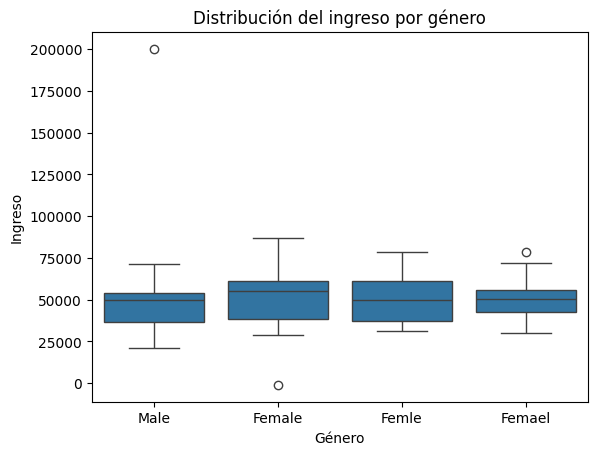

In [20]:
sns.boxplot(data=df, x='Gender', y='Income')
plt.title("Distribución del ingreso por género")
plt.xlabel("Género")
plt.ylabel("Ingreso")
plt.show()

#### Variable Tranformations


In [21]:
df['Income_log'] = np.log1p(df['Income'])

c:\Users\gabri\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [22]:

df = pd.get_dummies(df, columns=['Gender'], drop_first=True)

In [23]:
df = pd.get_dummies(df, columns=['City'], drop_first=True)

In [24]:
df.head()

,Age,Income,Registered,Income_log,Gender_Female,Gender_Femle,Gender_Male,City_New York,City_Paris,City_Tokyo
0,34.967142,28769.438869,1.0,10.267104,False,False,True,True,False,False
1,28.617357,43690.320159,0.0,10.684905,True,False,False,False,True,False
2,36.476885,44859.282252,1.0,10.711308,False,False,True,False,False,True
3,45.230299,37965.840962,0.0,10.544468,True,False,False,False,False,False
4,27.658466,47580.714325,1.0,10.770204,False,False,True,True,False,False
